# Q1-NN


### Dependencies 


This quantum algorithm uses qiskit, numpy, skelearn  and seaborn as dependencies to run the cide.

In [1]:
# import sklearn to load the iris dataset and split the dataset in train and test model, and the metric confusion matrix
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import pandas to use seaborn plots as hue parameter
import pandas as pd

# import seaborn to plot the iris dataset
import seaborn as sns

# import numpy for postprocessing to find the k-nn label
import numpy as np

# import qiskit minimal methods to use quantum circuit and use qubits as the classical bits
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister,transpile
from qiskit.circuit.library.standard_gates import RYGate,RZGate
import sys
import os
cwd = os.getcwd()
sep = os.path.sep
dir = sep.join(cwd.split(sep)[:-2])
sys.path.append(dir) 


from qknn.functions import index_positions, diffuser, qram, oracle_st, qknn, qknn_experiments

# Dataset

Obtained  iris dataset from sklearn using dataset module. The iris dataset is used, which has 3 classes: **Iris-setosa**,**Iris-versicolor**,**Iris-virginica**, each with 50 instances, resulting in a total of 150.


In [2]:
iris = datasets.load_iris()

This dataset plot using Seaborn module, a dataframe is required to read the variables, denoted as 'var1', 'var2', 'var3', and 'var4', along with the 'class' for color differentiation. Additionally, the chosen color palette is 'Paired'. 

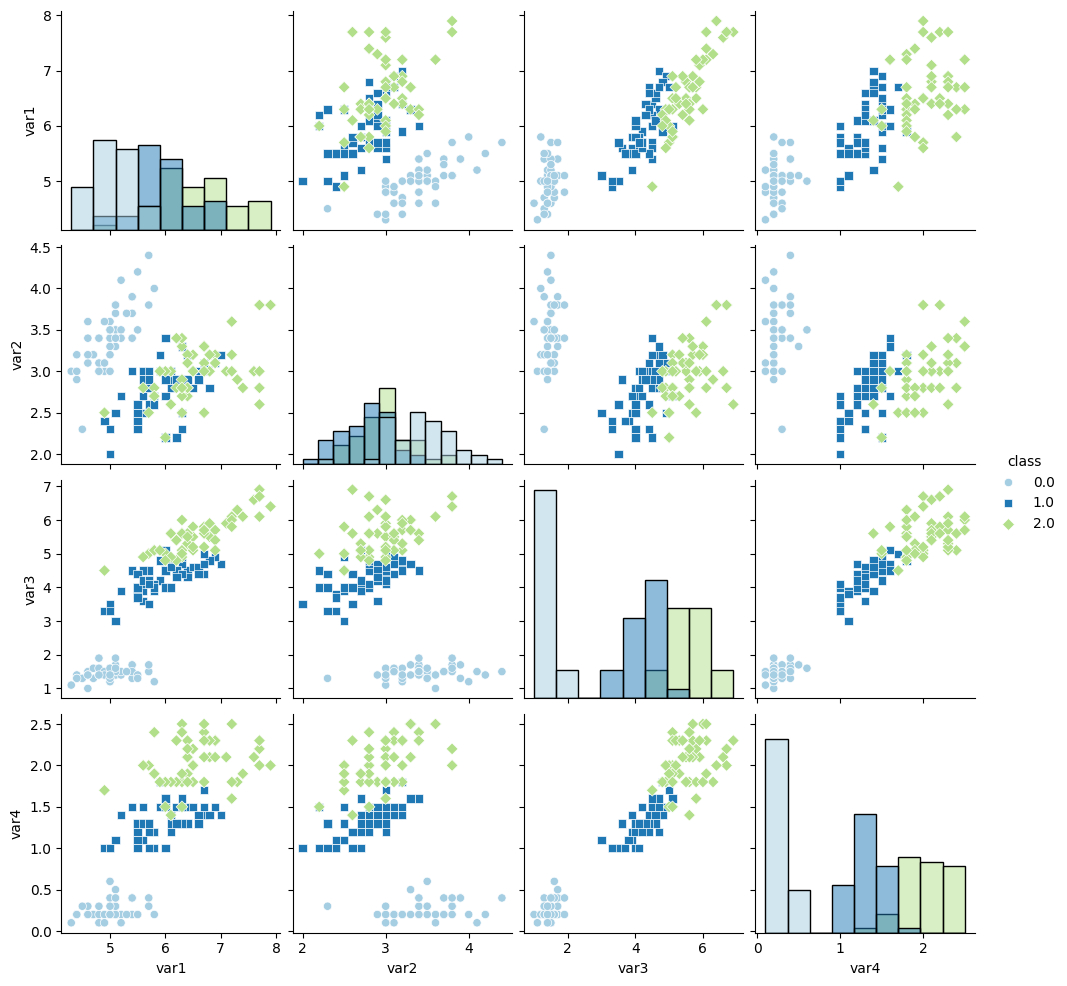

In [3]:
df_iris = pd.DataFrame(np.append(iris['data'],np.atleast_2d(iris['target']).T, axis=1))
df_iris.columns =['var1', 'var2', 'var3', 'var4',"class"]
sns.pairplot(df_iris,hue="class", diag_kind="hist", markers=["o", "s", "D"], palette="Paired")

The hold-out method is used, with a split of 70% for the training set and 30% for the test set.

###  Results

In [4]:
features = len(iris['data'][0])
experiment_size = 10
min_QRAM = 3
max_QRAM = 7
train_size = 0.7
max_trials = 1 #int(np.ceil(np.sqrt(max_QRAM-1))-1)
seed = [1,2,4,5,6,10,11,12,13,18]

In [5]:
max_trials

1

#### RY

In [6]:
qknn_e = qknn_experiments(
    x_data=iris['data'],
    y_data=iris['target'],
    max_trials=max_trials,
    features=features,
    min_QRAM=min_QRAM,
    max_QRAM=max_QRAM,
    rotation="ry",
    experiment_size=experiment_size,
    seed = seed)

print(qknn_e.experiments_knn(k=1))
qknn_e.print_results()

0
88.88888888888889
91.11111111111111
97.77777777777777
95.55555555555556
1
80.0
77.77777777777779
97.77777777777777
97.77777777777777
2
95.55555555555556
91.11111111111111
91.11111111111111
95.55555555555556
3
95.55555555555556
86.66666666666667
97.77777777777777
95.55555555555556
4
80.0
77.77777777777779
95.55555555555556
97.77777777777777
5
93.33333333333333
95.55555555555556
84.44444444444444
93.33333333333333
6
86.66666666666667
93.33333333333333
88.88888888888889
86.66666666666667
7
93.33333333333333
97.77777777777777
95.55555555555556
95.55555555555556
8
82.22222222222221
86.66666666666667
77.77777777777779
84.44444444444444
9
97.77777777777777
100.0
95.55555555555556
95.55555555555556
([88.88888888888889, 80.0, 95.55555555555556, 95.55555555555556, 80.0, 93.33333333333333, 86.66666666666667, 93.33333333333333, 82.22222222222221, 97.77777777777777], [91.11111111111111, 77.77777777777779, 91.11111111111111, 86.66666666666667, 77.77777777777779, 95.55555555555556, 93.3333333333333

#### RZ

In [7]:
qknn_e = qknn_experiments(
    x_data=iris['data'],
    y_data=iris['target'],
    max_trials=max_trials,
    features=features,
    min_QRAM=min_QRAM,
    max_QRAM=max_QRAM,
    rotation="rz",
    train_size=train_size,
    experiment_size=experiment_size,
    seed = seed)

print(qknn_e.experiments_knn(k=1))
qknn_e.print_results()

0
88.88888888888889
93.33333333333333
97.77777777777777
93.33333333333333
1
80.0
73.33333333333333
97.77777777777777
95.55555555555556
2
95.55555555555556
93.33333333333333
95.55555555555556
91.11111111111111
3
95.55555555555556
91.11111111111111
95.55555555555556
95.55555555555556
4
73.33333333333333
77.77777777777779
88.88888888888889
93.33333333333333
5
93.33333333333333
95.55555555555556
93.33333333333333
95.55555555555556
6
88.88888888888889
93.33333333333333
93.33333333333333
86.66666666666667
7
93.33333333333333
97.77777777777777
93.33333333333333
95.55555555555556
8
84.44444444444444
91.11111111111111
86.66666666666667
91.11111111111111
9
97.77777777777777
100.0
95.55555555555556
97.77777777777777
([88.88888888888889, 80.0, 95.55555555555556, 95.55555555555556, 73.33333333333333, 93.33333333333333, 88.88888888888889, 93.33333333333333, 84.44444444444444, 97.77777777777777], [93.33333333333333, 73.33333333333333, 93.33333333333333, 91.11111111111111, 77.77777777777779, 95.555555

In [9]:
import numpy as np
def mae_acc(acc:list):
    """
    Obtain the MAE  from a lsit of accuracy values
    Args:

        self: is part of the class
        acc: a list of float values about the accuracy

    Returns:
        mean: float value that is the MAE accuracy
        error: float value that is the error from the MAE accuracy
    """
    if acc == []:
        return 0,0       
        
    mean =  np.mean(np.asarray(acc))
    n = len(acc)
    summ = 0
    for i in range(n):
        summ += abs(mean - acc[i])
    if summ == 0:
	    return mean,0
    else:
        return mean,summ/n

In [17]:
nn1 = [95.55555555555556,97.77777777777777,93.33333333333333,91.11111111111111,93.33333333333333]

In [18]:
mae_acc(nn1)

(94.2222222222222, 1.9555555555555515)